In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("lifeSatisfactionData.csv")
x = df.iloc[0:len(df),3:9]
x = pd.concat([pd.Series(1, index=x.index, name='1'), x], axis=1)
y = df.iloc[:,2]
theta = np.zeros(len(x.columns))
t=np.zeros(len(x.columns))
m = len(df)

In [2]:
#hypothesis functon
def hyp(theta, x):
    h=x*theta
    h=np.sum(h,axis=1)
    return h

In [3]:
#cost Function
def Costfun(x,y,theta):
    h = hyp(theta, x)
    return sum((h-y)**2)/(2*m)

In [4]:
#Gradient Descent function
def GradientDescent(x,y,theta,it,lr):
    J = []
    for i in range(it):
        h=hyp(theta,x)
        for k in range(len(x.columns)):
            z=x.iloc[:,k]
            theta[k]=theta[k]-(lr/m)*sum((h-y)*z)
        J.append(Costfun(x, y, theta))
    return J,theta

In [5]:
K,theta=GradientDescent(x,y,theta,1000,0.003)

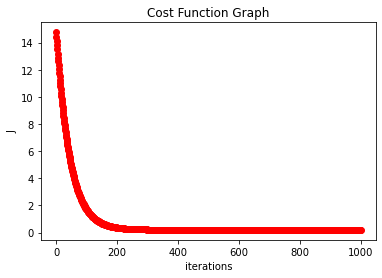

In [6]:
#plotting the variation of J along the iterations
plt.figure()
xAxis=list(range(0, 1000))
yAxis=K
plt.plot(xAxis,yAxis,color='red', marker='o')
plt.title('Cost Function Graph')
plt.xlabel('iterations')
plt.ylabel('J')
plt.show()

In [24]:
# test after fitting 
test1=[1, 1.3, 1.2, 0.845, 0.659 , 0.334 ,0.744]
d=pd.DataFrame(columns=['init','Support','GDP','Health','Freedom','Generosity','Corruption'])
d.loc[0] = test1

p= hyp(theta, d)
print('the predicted score is :  '+ str(p[0]))

the predicted score is :  6.65679099009895
